In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import pandas as pd
import warnings
import torch

# Suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
class_indices = {'Cat' : 0, 'Dog' : 1}

# Invert the dictionary to map indices to class names
class_names_mapping = {v: k for k, v in class_indices.items()}

# Check which class is mapped to class 0 and which to class 1
class_0 = class_names_mapping[0]
class_1 = class_names_mapping[1]

In [3]:
print(f"Class 0 is mapped to '{class_0}'")
print(f"Class 1 is mapped to '{class_1}'")

Class 0 is mapped to 'Cat'
Class 1 is mapped to 'Dog'


In [6]:
interpreter = tf.lite.Interpreter(model_path='QATModel.tflite')
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [7]:
# Prepare the image
def preprocess_image(image_path, input_shape):
    img = Image.open(image_path).convert('RGB')
    img = img.resize((input_shape[1], input_shape[2]))
    img = np.array(img, dtype=np.float32)
    img = np.expand_dims(img, axis=0)
    img = img / 128 - 1
    print(img.shape)
    return img

In [9]:
# Load and preprocess the image
image_path = "uploads/test.jpg"
input_shape = input_details[0]['shape']
image = preprocess_image(image_path, input_shape)


(1, 28, 28, 3)


Output Data : [[0.54296875 0.45703125]]
Predicted class: 0
Predicted class name: Cat
Confidence =  tensor(0.5430)
Predicted_Class =  tensor(0)


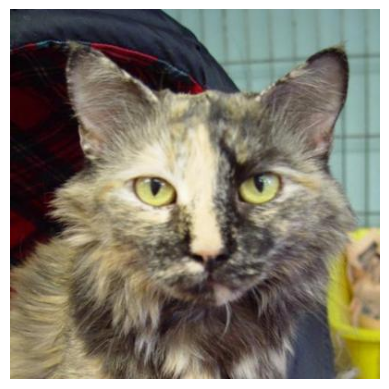

In [15]:
# Set the tensor
interpreter.set_tensor(input_details[0]['index'], image)


# Run the inference
interpreter.invoke()

# Get the output
output_data = interpreter.get_tensor(output_details[0]['index'])
# Get predicted label
predicted_label = np.argmax(output_data, axis=1)[0]

# Print the predicted label
print(f"Output Data : {output_data}")
print(f"Predicted class: {predicted_label}")
predicted_class_name = class_names_mapping[predicted_label]
print(f"Predicted class name: {predicted_class_name}")

output = torch.from_numpy(output_data[0])
confidence, predicted_class = torch.max(output, 0)

print("Confidence = ", confidence)
print("Predicted_Class = ", predicted_class)

# Display the image
import matplotlib.pyplot as plt

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()